In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
closeddf = pd.read_csv('closed.csv')
opendf = pd.read_csv('openrest.csv')

In [3]:
def drop_low_counts(dataframe):
    h = []
    for i in np.where(dataframe.review_count < 16):
        h.append(i)
    return opendf.drop(index = h[0], inplace = True)

In [4]:
drop_low_counts(opendf)

In [5]:
df = pd.concat([closeddf, opendf], axis = 0)

In [6]:
df.drop(columns = ['Unnamed: 0','distance', 'id', 'image_url','phone'], inplace = True)

In [8]:
def reformat_categories(column):
    y = []
    for i in column:
        try:
            y.append(i.strip('][').split(', ')[3][10:-2])
        except IndexError:
            y.append(i.strip('][').split(', ')[1][10:-2])
    return y

In [9]:
df['categories'] = reformat_categories(df.categories)

In [10]:
df['categories'] = df.categories.replace("'cafe", 'Cafes')

In [11]:
#randomizing and re-indexing the rows

df = df.sample(frac=1).reset_index(drop=True)

In [12]:
#dropping a few non-restaurants that made it into our dataset

df = df[df['categories'] != 'Souvenir Shops']
df = df[df['categories'] != 'Candy Stores']
df = df[df['categories'] != 'Print Media']

In [13]:
#creating a mini DataFrame of categories the permanently closed dummy

closedcat = df.groupby(['categories'])['permanently closed'].value_counts().unstack().fillna(0)

In [14]:
#adding a percentage column to closedcat

closedcat['percentclosed'] = (round(closedcat[1]/(closedcat[0]+closedcat[1]), 2)*100).astype(int)

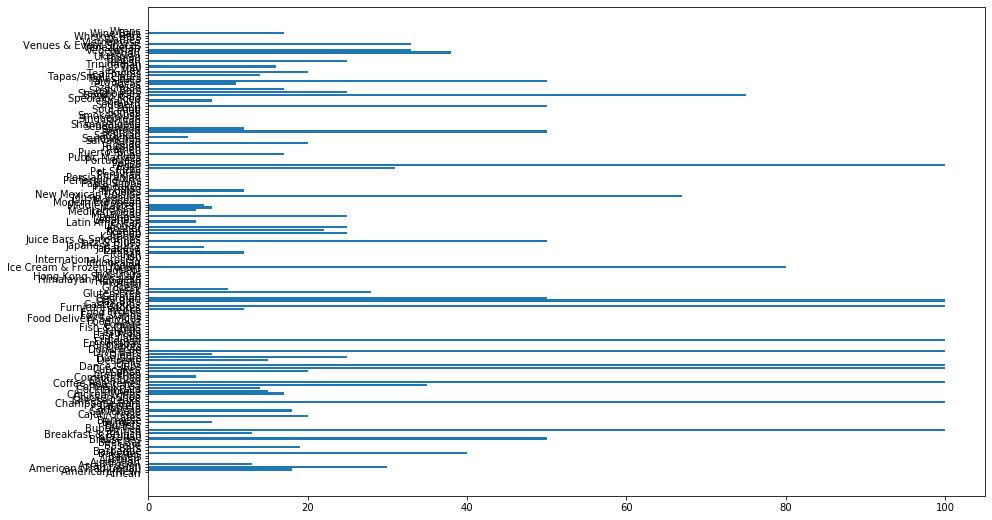

In [15]:
#this is a mess and we need to bin some categories

fig, ax = plt.subplots(figsize = (15, 9))
plt.barh(y = closedcat.index, width = closedcat.percentclosed);

In [16]:
df.categories.value_counts()

Breakfast & Brunch    94
American (New)        77
Italian               66
Bars                  57
Cocktail Bars         56
                      ..
Buffets                1
Burmese                1
Portuguese             1
Pan Asian              1
Venezuelan             1
Name: categories, Length: 158, dtype: int64

In [17]:
df['categories'] = df.categories.replace(['Gay Bars', 'Dive Bars', 'Sports Bars', 'Wine Bars', 'Champagne Bars', 'Cocktail Bars', 'Beer Bar', 'Whiskey Bars', 'Karaoke', 'Lounges', 'Dance Clubs'], 'Bars')

df['categories'] = df.categories.replace(['Coffee & Tea', 'Tea Rooms', 'Juice Bars & Smoothies', 'Bubble Tea', 'Furniture Stores', 'Coffee Roasteries', 'Pet Stores'], 'Cafes')

df['categories'] = df.categories.replace(['Burgers', 'Sandwiches', 'Comfort Food', 'Diners', 'Southern', 'Salad', 'Pubs', 'Chicken Wings', 'Delis', 'Hot Dogs', 'Fast Food', 'Cheesesteaks', 'Barbeque', 'Soul Food', 'Soup', 'Wraps', 'Buffets', 'Smokehouse', 'American (Traditional)', 'Chicken Shop'], 'American (Casual)')

df['categories'] = df.categories.replace(['Gastropubs'], 'American (New)')

df['categories'] = df.categories.replace(['Szechuan', 'Cantonese', 'Hot Pot', 'Shanghainese', 'Dim Sum', 'Hong Kong Style Cafe'], 'Chinese')

df['categories'] = df.categories.replace(['Bakeries', 'Desserts', 'Ice Cream & Frozen Yogurt', 'Cupcakes'], 'Bakeries and Desserts')

df['categories'] = df.categories.replace(['Trinidadian', 'Cuban'], 'Caribbean')

df['categories'] = df.categories.replace(['Sushi Bars', 'Ramen', 'Izakaya', 'Japanese Curry'], 'Japanese')

df['categories'] = df.categories.replace(['Italian', 'French', 'Tapas/Small Plates', 'Pasta Shops', 'Irish', 'German', 'Sicilian', 'Sardinian', 'Modern European', 'Brasseries', 'Scottish', 'British', 'Fish & Chips', 'Basque', 'Portuguese', 'Tuscan', 'Austrian', 'Spanish', 'Tapas Bars'], 'European')

df['categories'] = df.categories.replace(['Mediterranean', 'Greek', 'Middle Eastern', 'Falafel', 'Turkish', 'Kebab', 'Halal', 'Persian/Iranian', 'Lebanese'], 'Middle Eastern/Mediterranean')

df['categories'] = df.categories.replace(['Tacos', 'New Mexican Cuisine', 'Tex-Mex'], 'Mexican')

df['categories'] = df.categories.replace(['Empanadas', 'Puerto Rican', 'Salvadoran', 'Dominican', 'Colombian', 'Peruvian', 'Brazilian', 'Venezuelan'], 'Latin American')

df['categories'] = df.categories.replace(['Laotian', 'Taiwanese', 'Malaysian', 'Thai', 'Singaporean', 'Burmese', 'Vietnamese', 'Pan Asian', 'Indonesian', 'Filipino', 'Asian Fusion'], 'South Asian') 

df['categories'] = df.categories.replace(['Ethiopian', 'Senegalese', 'Somali', 'Moroccan'], 'African') 

df['categories'] = df.categories.replace(['Creperies', 'Waffles', 'Bagels', 'Pancakes', 'Donuts'], 'Breakfast & Brunch')

df['categories'] = df.categories.replace(['Vegetarian', 'Vegan', 'Kosher', 'Gluten-Free'], 'Specialty Food')

df['categories'] = df.categories.replace(['Russian', 'Polish', 'Georgian', 'Ukrainian', 'Himalayan/Nepalese'], 'Eastern Europe/Central Asia')

df['categories'] = df.categories.replace(['Public Markets', 'Performing Arts', 'Food Trucks', 'Food Court', 'Festivals', 'Venues & Event Spaces', 'Music Venues', 'Caterers', 'Food Stands', 'Jazz & Blues', 'Food Delivery Services'], 'Mobile, Events and Venues')

df['categories'] = df.categories.replace(['Indian', 'Hawaiian', 'Australian', 'Cajun/Creole', 'International Grocery', 'Grocery', 'Fondue', 'Poke'], 'Misc')

In [18]:
#remaking the closedcat dataframe now that everything is binned

closedcat = df.groupby(['categories'])['permanently closed'].value_counts().unstack().fillna(0)

closedcat['percentclosed'] = (round(closedcat[1]/(closedcat[0]+closedcat[1]), 2)*100).astype(int)

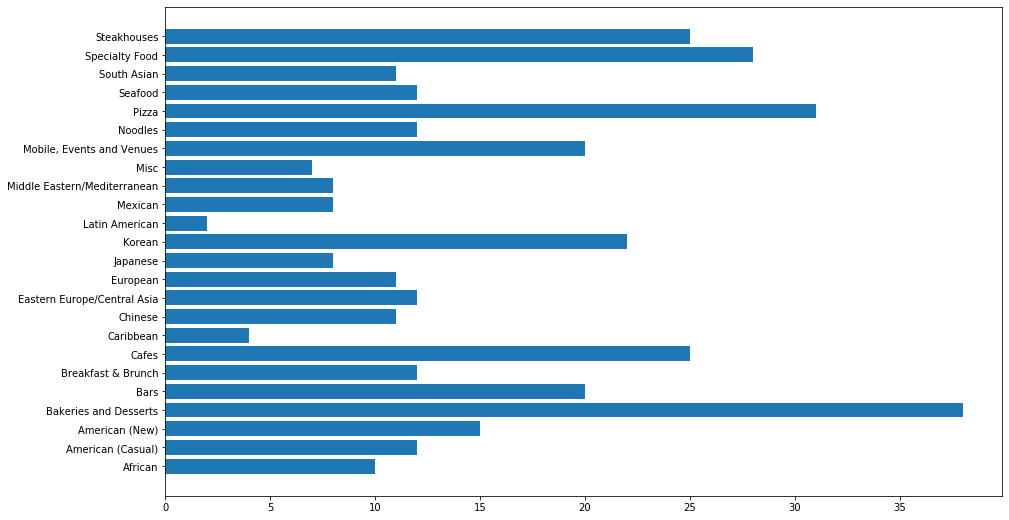

In [19]:
fig, ax = plt.subplots(figsize = (15, 9))
plt.barh(y = closedcat.index, width = closedcat.percentclosed);